# Overview

Processing of data from 97 subjects who completed the Unique Corporate Association Valence task. In this task, particpants were provided different colored shirts and cars and were subsequently asked to list three unique associations regarding each image.

The purpose of this document is to process and the associations with NLP methods. 

https://www.researchgate.net/publication/247478798_Assessing_the_corporate_brand_The_Unique_Corporate_Association_Valence_UCAV_approach

# Initial Reqs

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from math import pi
from itertools import combinations_with_replacement
import pickle
from IPython.display import display
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from natsort import natsorted
import seaborn as sns
import scipy.stats as stats 
from collections import Counter
from itertools import groupby
from operator import itemgetter
from itertools import combinations
import time
import datetime
import choix
import plotly.graph_objects as go
from tqdm import tqdm
import glob
import natsort
from tabulate import tabulate
from scipy.spatial import distance

# Load subjects

In [75]:
finalSubs=['sub'+str(i) for i in np.arange(1,97)]

In [2]:
finalSubs=['sub'+str(i) for i in np.concatenate([np.arange(1,84),np.arange(85,97)])]#removed 84 which is random


os.chdir(r"C:\Users\al33m\Box\Grzywacz Lab\Experiment\age_DataFiles\final\pickle")
#subject class for loading
class Subject():
    def __init__(self,subname):
        self.subname=subname
#load
Subs={}
for i in tqdm(finalSubs):
    with open(i+'.pkl', 'rb') as input:
        Subs[i] = pickle.load(input)

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:09<00:00, 10.06it/s]


## NLP

NLP analysis of subject's associations, cleaning stopwords, hyphens, and misspellings etc

### pre processing

In [90]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
lemmatizer = WordNetLemmatizer() 
stemmer = PorterStemmer() 

In [49]:
def text_lowercase(text): 
    return text.lower() 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator)
def remove_whitespace(text): 
    return  "_".join(text.split())
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words]
    if len(filtered_text)>1:
        filtered_text=' '.join(filtered_text)
    elif len(filtered_text)==1:
#         print(len(filtered_text))
        filtered_text=filtered_text[0]
    if len(filtered_text)==0:
        print(filtered_text)
        print('encountered zero length')
        filtered_text='NONE'
    return filtered_text
# stem words in the list of tokenised words 
def stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return stems 
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def flatlister(mylist):
    return([item for sublist in mylist for item in sublist])

In [51]:
remove_stopwords('a fire')

'fire'

In [119]:
allValc=allVal.copy(deep=True)

In [120]:
words=allValc.association
words=[i.lower() for i in words]#lower case
words=[remove_punctuation(i) for i in words]
words=[remove_stopwords(i) for i in words]
# words=[remove_whitespace(i) for i in words]

wordLemmas=[]
for k in words:
    wordLemmas.append(lemmatize_word(k)[0])
# wordLemmas=[flatlister(i) for i in wordLemmas]                

[]
encountered zero length
[]
encountered zero length
[]
encountered zero length
[]
encountered zero length
[]
encountered zero length
[]
encountered zero length


In [121]:
allValc['associations_processed']=wordLemmas

In [122]:
allValc.head()

,association,hue,wordN,subname,category,valence,valenceN,valenceVal,associations_processed
0,father,1,1,sub49,car,Positive,1,2,father
1,Fire Engine,1,1,sub8,car,Neutral,1,0,fire
2,a classic,1,1,sub35,car,Positive,1,2,classic
3,Blood,1,1,sub30,car,Very Positive,1,3,blood
4,ferrari,1,1,sub41,car,Very Positive,1,3,ferrari


In [123]:
np.where(allValc.associations_processed=='NONE')#remove all that don't make sense

(array([ 611, 1923, 1964, 2333, 2460, 2619], dtype=int64),)

In [124]:
allValc.loc[np.where(allValc.associations_processed=='NONE')]

,association,hue,wordN,subname,category,valence,valenceN,valenceVal,associations_processed
611,no,5,3,sub29,car,Very Negative,3,-3,NONE
1923,no,1,2,sub29,shirt,Neutral,2,0,NONE
1964,no,1,3,sub29,shirt,Neutral,3,0,NONE
2333,no,4,3,sub29,shirt,Neutral,3,0,NONE
2460,myself,6,1,sub49,shirt,Slightly Positive,1,1,NONE
2619,off,7,1,sub25,shirt,Negative,1,-2,NONE


In [125]:
allValc.loc[2460,'associations_processed']='myself'
allValc.loc[2619,'associations_processed']='off'

In [126]:
allValc.loc[np.where(allValc.associations_processed=='NONE')]

,association,hue,wordN,subname,category,valence,valenceN,valenceVal,associations_processed
611,no,5,3,sub29,car,Very Negative,3,-3,NONE
1923,no,1,2,sub29,shirt,Neutral,2,0,NONE
1964,no,1,3,sub29,shirt,Neutral,3,0,NONE
2333,no,4,3,sub29,shirt,Neutral,3,0,NONE


In [127]:
#drop other rows with sub 29?
allValc=allValc[allValc.associations_processed!='NONE']

In [128]:
allValc.reset_index(drop=True,inplace=True)

In [103]:
allValc.head()

,association,hue,wordN,subname,category,valence,valenceN,valenceVal,associations_processed
0,father,1,1,sub49,car,Positive,1,2,father
1,Fire Engine,1,1,sub8,car,Neutral,1,0,fire
2,a classic,1,1,sub35,car,Positive,1,2,classic
3,Blood,1,1,sub30,car,Very Positive,1,3,blood
4,ferrari,1,1,sub41,car,Very Positive,1,3,ferrari


In [133]:
words=allValP.associations_processed
words=[i.lower() for i in words]#lower case
words=[remove_punctuation(i) for i in words]
words=[remove_stopwords(i) for i in words]
# words=[remove_whitespace(i) for i in words]

wordLemmas=[]
for k in words:
    wordLemmas.append(lemmatize_word(k)[0])

[]
encountered zero length
[]
encountered zero length


In [134]:
allValP['associations_processed']=wordLemmas

In [138]:
allValP.reset_index(drop=True,inplace=True)

In [139]:
allValP.head()

,association,hue,wordN,subname,category,valence,valenceN,valenceVal,associations_processed
0,father,1,1,sub49,car,Positive,1,2,father
1,Fire Engine,1,1,sub8,car,Neutral,1,0,fire
2,a classic,1,1,sub35,car,Positive,1,2,classic
3,Blood,1,1,sub30,car,Very Positive,1,3,blood
4,ferrari,1,1,sub41,car,Very Positive,1,3,ferrari


## spaCy

https://spacy.io/

spaCy provides a database of words with a similarity metrix. This can be used to determine similarity amongst subject's associatons

In [140]:
import spacy
nlp = spacy.load('en_core_web_lg')
token = lambda word: nlp(word)[0]  # shortcut to convert string to spacy.Token
score_words = lambda w1, w2: token(w1).similarity(token(w2))

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize

In [142]:
wordsize=np.array([len(i) for i in allValP.associations_processed])

In [143]:
wordsize

array([6, 4, 7, ..., 4, 5, 6])

#### get frequencies of words

In [144]:
freq=nltk.FreqDist([i for i in allValP.groupby('hue').get_group(1).associations_processed])
freq2=nltk.FreqDist([i for i in allValP.groupby('hue').get_group(2).associations_processed])


In [177]:
stats.sem([i for i in freq.values()])

0.11860762147167274

In [178]:
np.var([i for i in freq.values()])

2.194571787902146

In [179]:
#do fore every hue
nsize=[]
empty=pd.DataFrame()
sem=[]
vari=[]
for k in allValP.hue.unique():
    freq=nltk.FreqDist([i for i in allValP.groupby('hue').get_group(k).associations_processed])
    nsize.append(len(freq))# number of unique associations... need to normalize by sum
    sem.append(stats.sem([i for i in freq.values()]))
    vari.append(np.var([i for i in freq.values()]))

    #     thisDF=pd.DataFrame({str(k)+'_words':freq.keys(),str(k)+'_counts':freq.ValPues()})#option 2
    empty=pd.concat([empty,pd.Series(freq)])
#     empty=pd.concat([empty,thisDF],axis=1)#option2

In [185]:
huecol=[]
for i,k in zip(nsize,allValP.hue.unique()):
    huecol.append(np.repeat(k,i))

In [186]:
len(flatlister(huecol))==len(empty)

True

In [187]:
empty=pd.DataFrame(empty)

In [188]:
empty['hue']=flatlister(huecol)

In [189]:
empty.columns=['count','hue']

In [190]:
empty.head()

,count,hue
father,2.0,1
fire,15.0,1
classic,1.0,1
blood,20.0,1
ferrari,5.0,1


In [153]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [254]:
nsize

[148, 150, 149, 167, 128, 149, 172, 157, 138, 142, 176, 204, 177, 162, 167]

In [155]:
import colorsys
mycols=[colorsys.hsv_to_rgb(i,0.75,0.75) for i in np.linspace(0,1,15,endpoint=False)]#hsv to rgb

In [157]:
nsize

[136, 139, 133, 159, 125, 143, 164, 141, 128, 127, 161, 188, 162, 149, 157]

Text(0, 0.5, 'Variance')

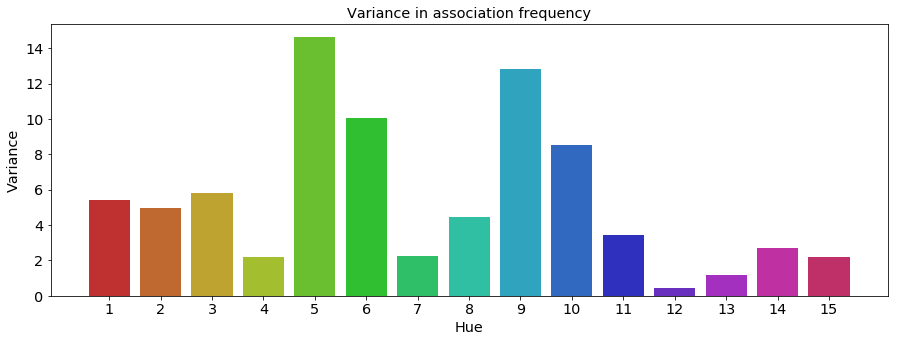

In [184]:
plt.bar([str(i) for i in np.arange(1,16)],vari,color=mycols)
plt.title('Variance in association frequency')
plt.xlabel('Hue')
plt.ylabel('Variance')

Variation in frequencies of associations as a funciton of the parent hue. 

Text(0, 0.5, '# of associations')

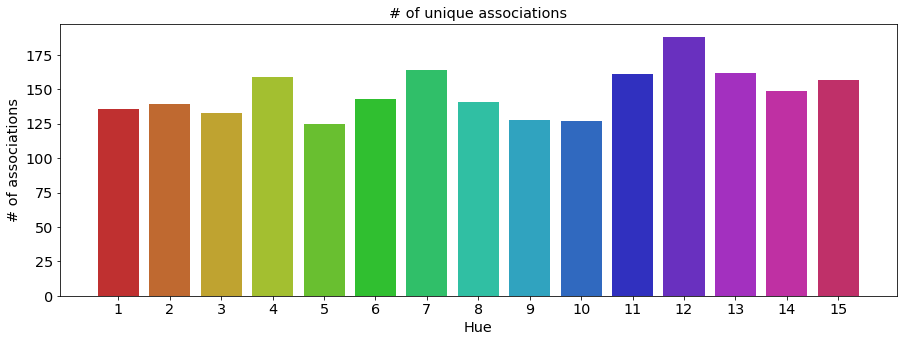

In [156]:
plt.bar([str(i) for i in np.arange(1,16)],nsize,color=mycols)
plt.title('# of unique associations')
plt.xlabel('Hue')
plt.ylabel('# of associations')

Number of uniqe associations for a given parent hue. The greenish hues have lesser unique associations. The effect would be more apparent if words such as 'leaf' and 'leaves' were bundled

In [199]:
#range and std
colSD=[]
colRange=[]
for i in np.arange(1,16):
    colSD.append(np.std(empty.groupby('hue').get_group(i)['count'].values))
    colRange.append(np.ptp(empty.groupby('hue').get_group(i)['count'].values))

Text(0, 0.5, 'Max - Min')

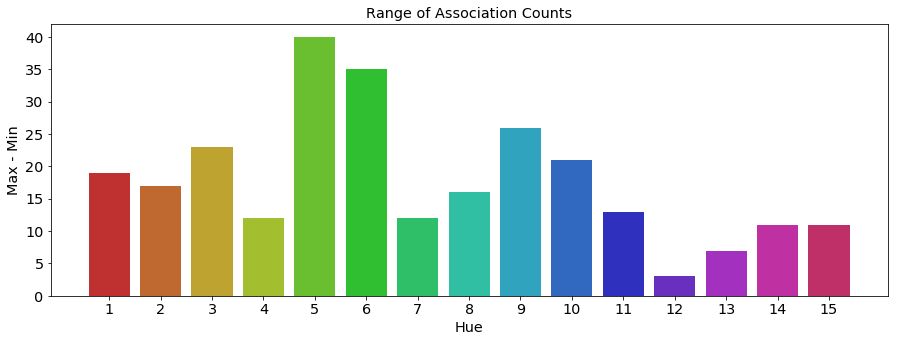

In [201]:
plt.bar([str(i) for i in np.arange(1,16)],colRange,color=mycols)
plt.title('Range of Association Counts')
plt.xlabel('Hue')
plt.ylabel('Max - Min')

What is the range of the maximum number of one association vs the minimum. For instance, greenish hues have a lot of the same association, e.g. leaf. Compared to hue 12, in which the maximum and minimum numbers are very close. This graph is essentially a corollary to the heterogeniety in associations, with lower values implying greater heterogeniety. 

### Frequency word clouds

In [202]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [203]:
def rgbInt(x):
    foo=[int(i) for i in np.round(np.array(x)*255)]
    return(tuple(foo))

In [345]:
rgbInt(mycols[0])

(191, 48, 48)

In [204]:
myIntCols=[rgbInt(i) for i in mycols]

In [205]:
myIntCols

[(191, 48, 48),
 (191, 105, 48),
 (191, 163, 48),
 (163, 191, 48),
 (105, 191, 48),
 (48, 191, 48),
 (48, 191, 105),
 (48, 191, 163),
 (48, 163, 191),
 (48, 105, 191),
 (48, 48, 191),
 (105, 48, 191),
 (163, 48, 191),
 (191, 48, 163),
 (191, 48, 105)]

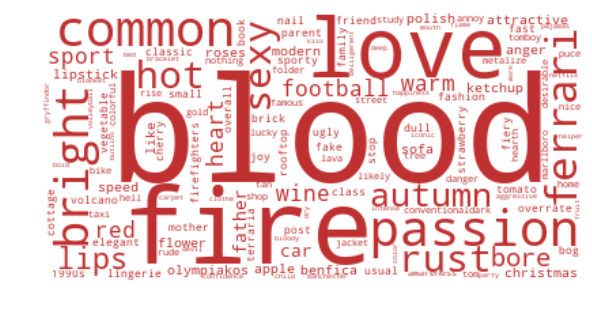

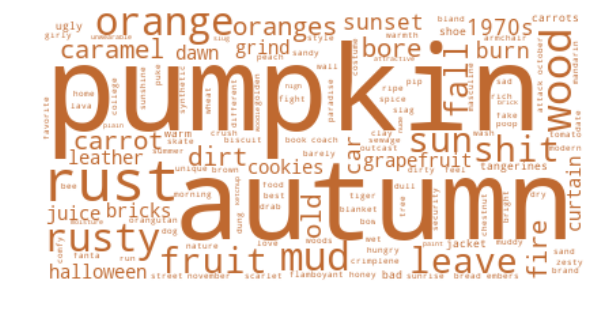

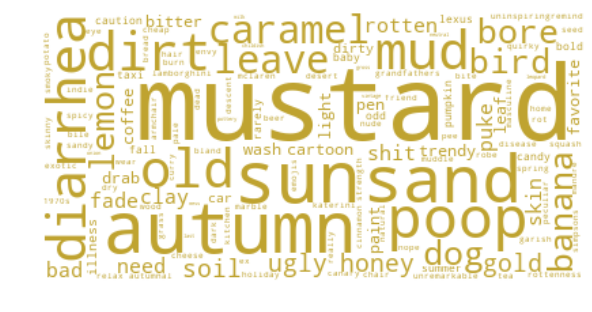

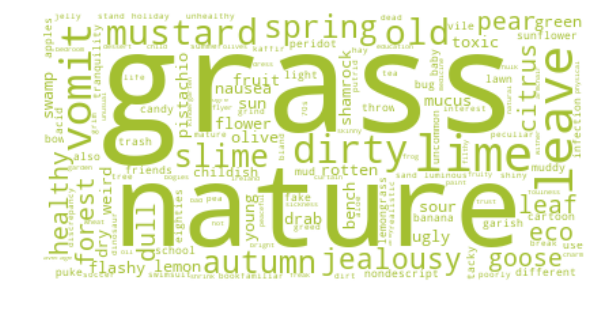

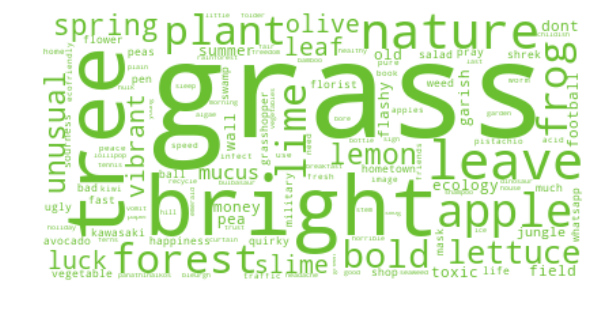

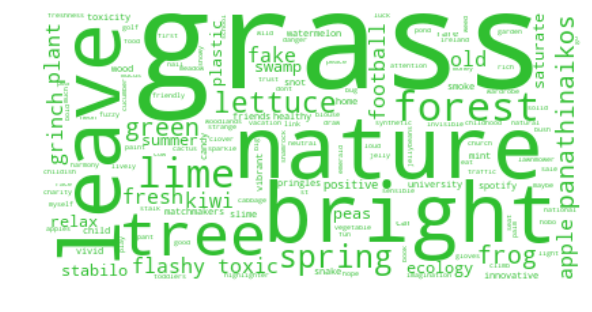

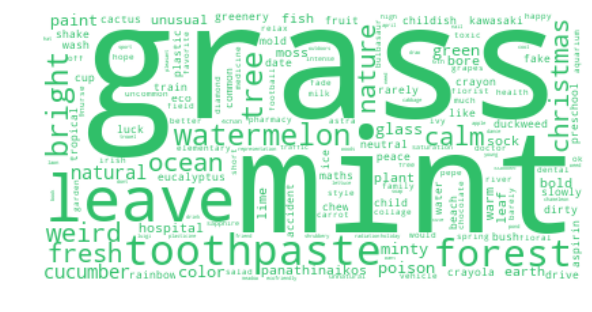

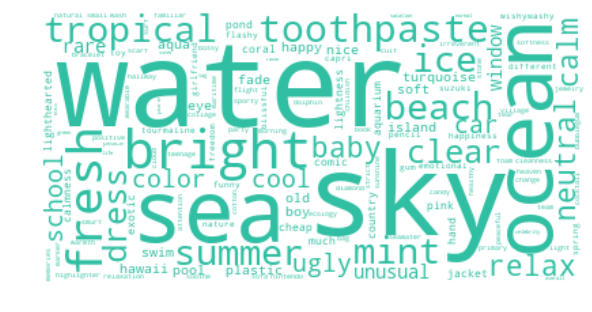

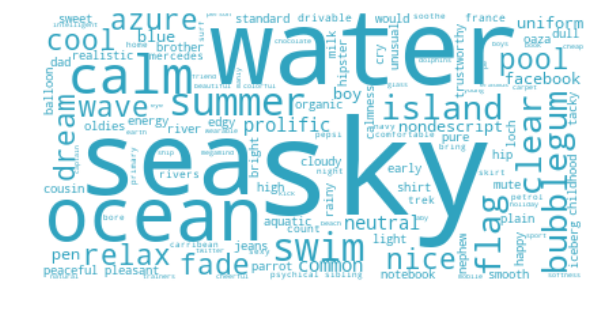

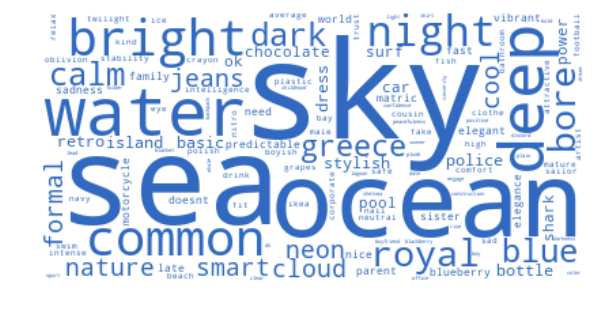

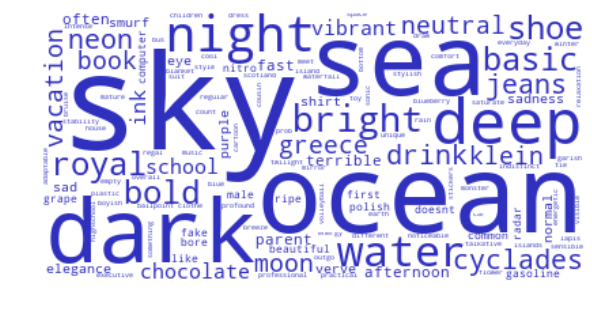

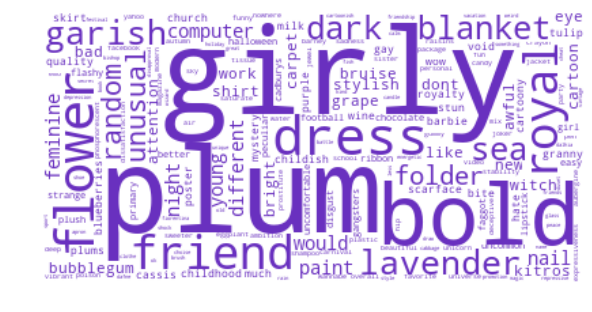

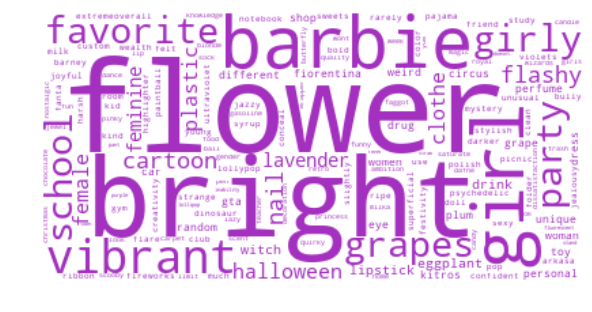

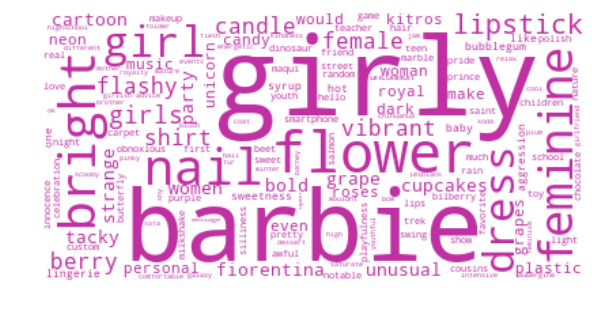

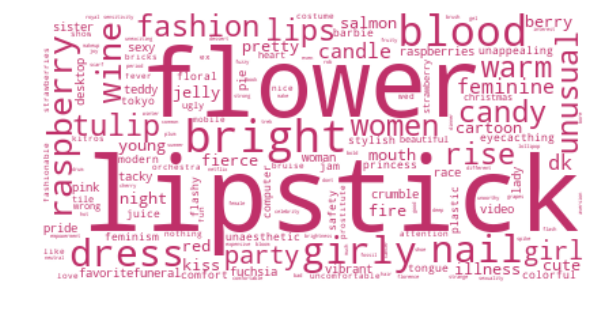

In [206]:
for hue in np.arange(1,16):
    wordcloud=WordCloud(background_color='white',color_func=lambda *args, **kwargs: myIntCols[hue-1])
    wordcloud.generate_from_frequencies(frequencies=empty.groupby('hue').get_group(hue)['count'])
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

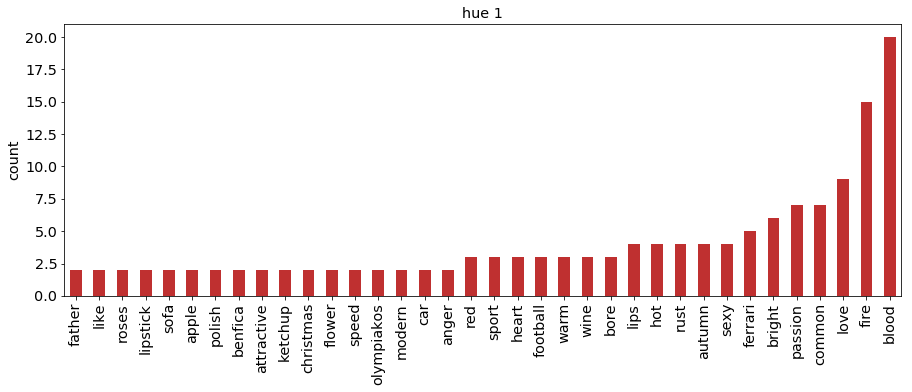

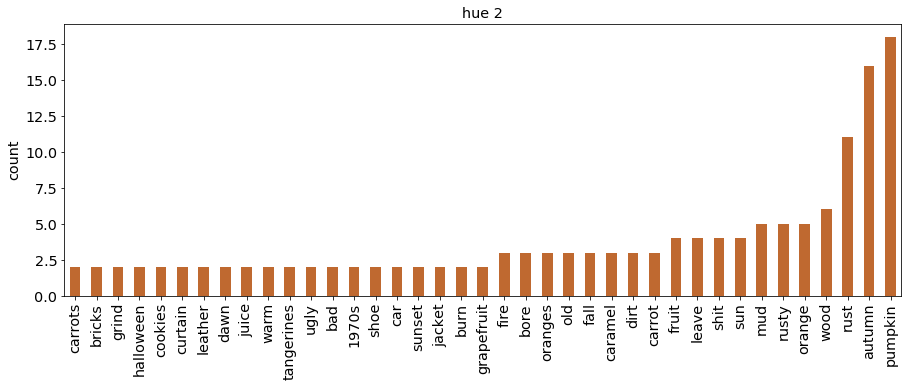

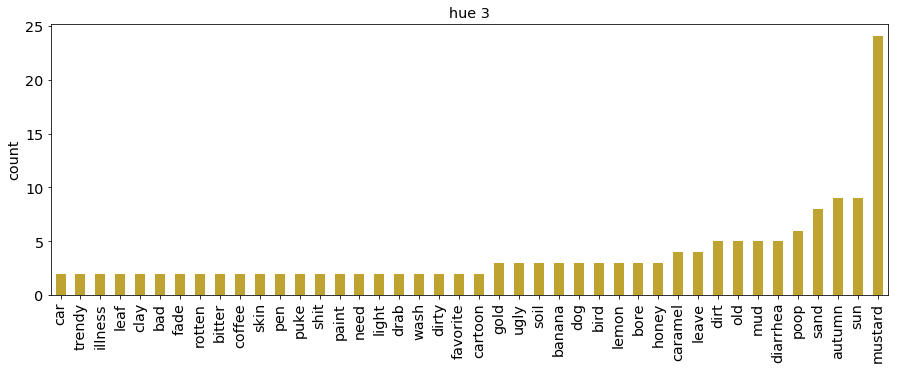

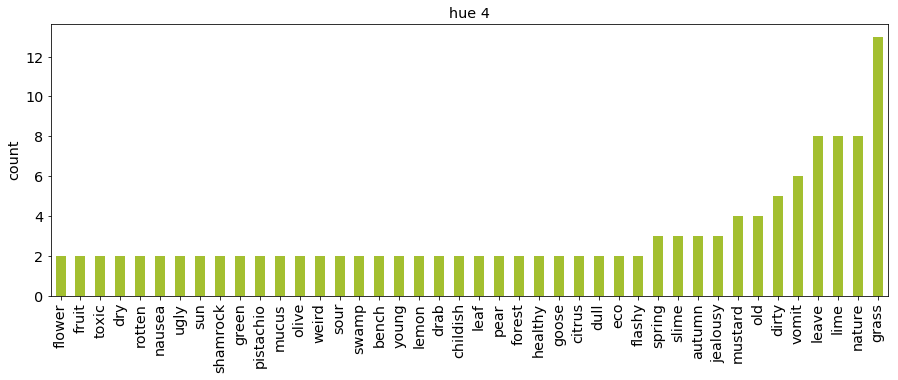

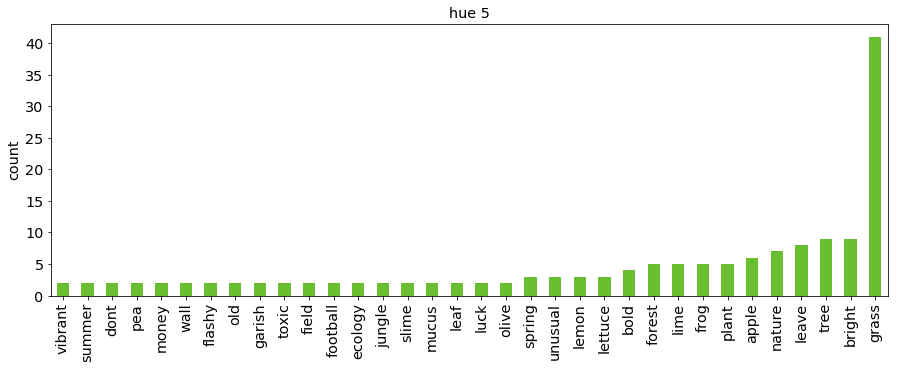

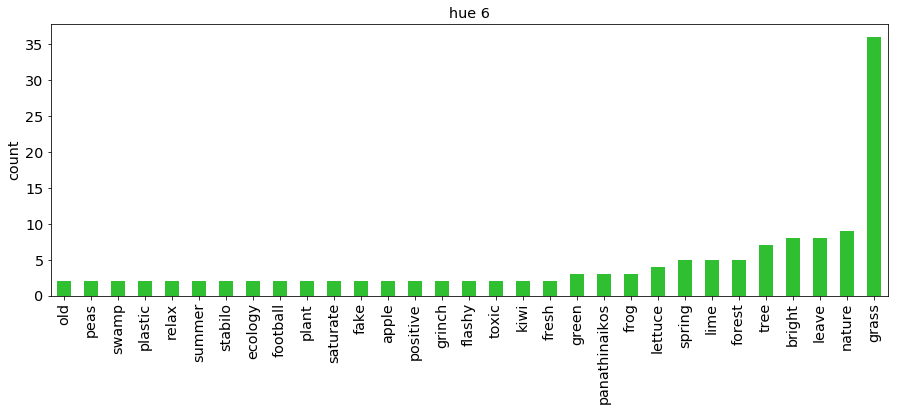

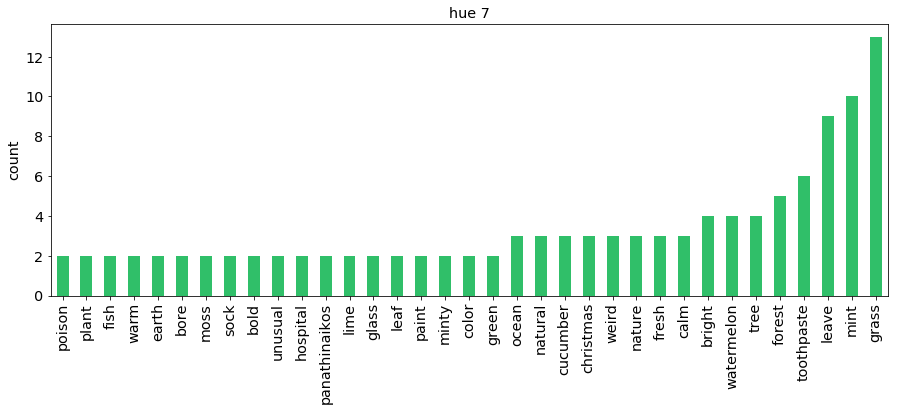

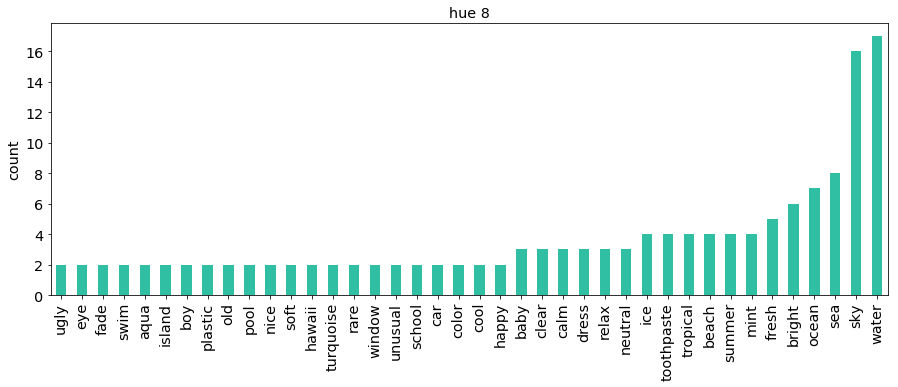

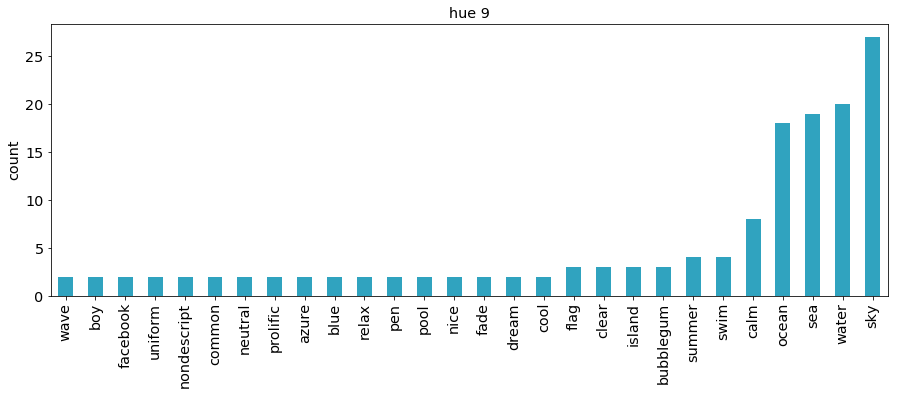

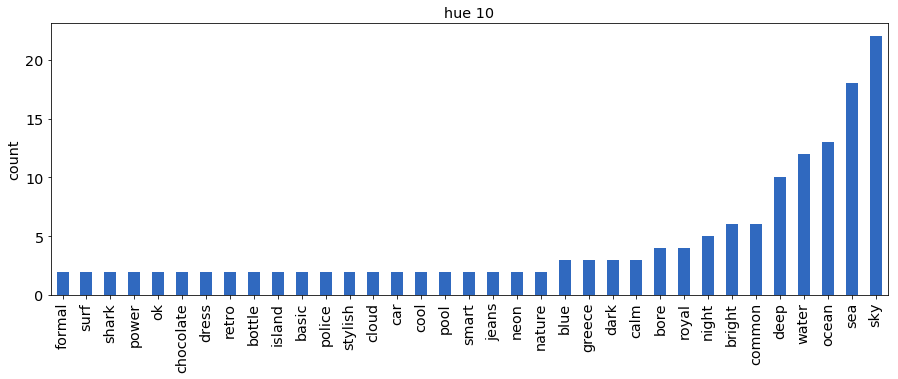

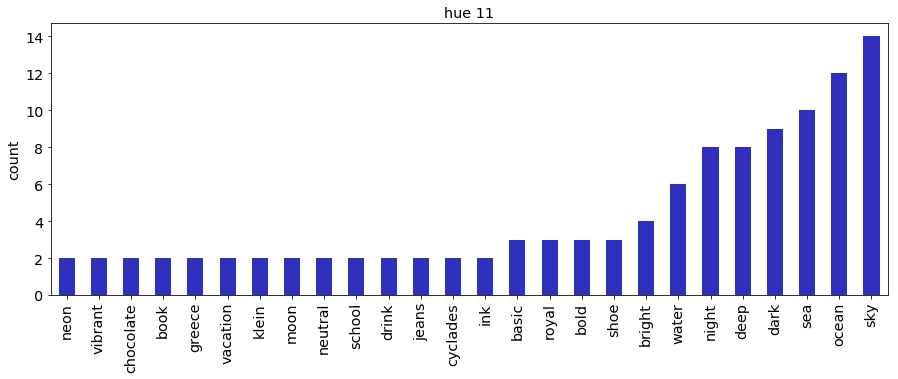

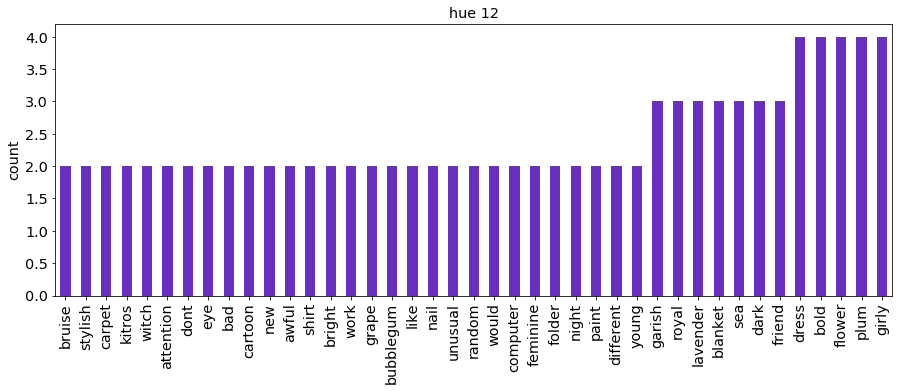

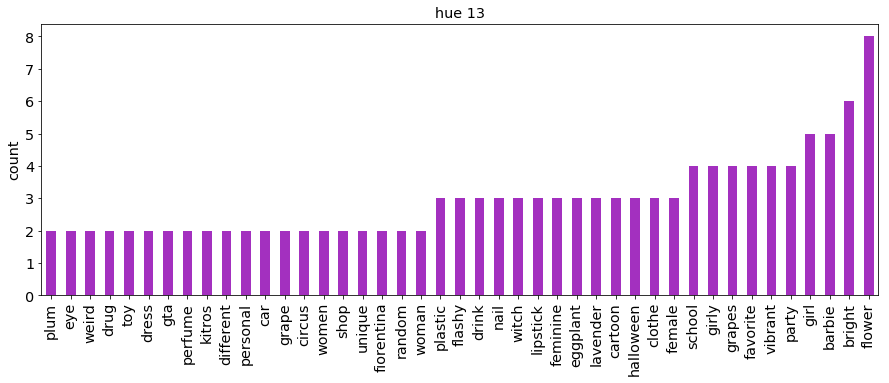

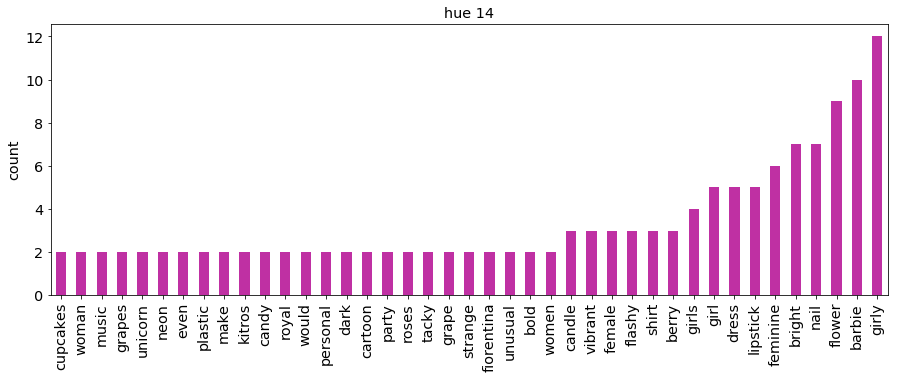

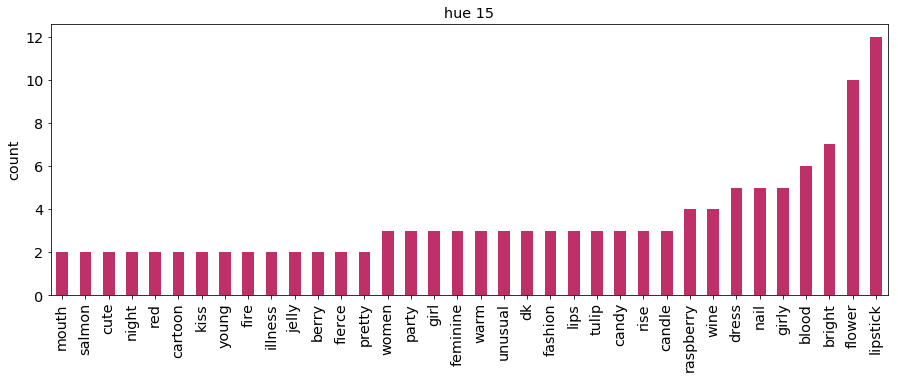

In [207]:
# plt.figure(figsize=(25,15))
for hue in np.arange(1,16):
    
    (empty.groupby('hue').get_group(hue)['count'][empty.groupby('hue').get_group(hue)['count']>1]).sort_values().plot(kind='bar',color=mycols[hue-1])
    plt.ylabel('count')
    plt.title('hue '+str(hue))
    plt.show()

What were the most hated words?

In [216]:
(allVal.groupby('association').agg({'valenceVal':'sum'})).sort_values(by='valenceVal').iloc[0:10]

,valenceVal
association,
flashy,-25
ugly,-24
boring,-21
plastic,-21
fake,-20
Toxic,-20
rust,-16
Vomit,-14
mucus,-13


## Semantic homogeneity of associations

Can also use language models to determine semantic homogeneity of associations. For example, 'tree' and 'leaf' are closer than  'tree' and 'basketball'

In [264]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:,None] < r
    return A[mask]

In [265]:
class hueObj:
    def __init__(self, name):
        self.name=name
        self.vals=allVal2.groupby('hue').get_group(name).associations_processed.values
        self.uniqueVals=np.unique(self.vals)
        self.df=pd.DataFrame([i for i in combinations(self.uniqueVals,2)])
        self.mat=pd.DataFrame(columns=self.uniqueVals,index=self.uniqueVals)
        for i in self.mat.columns:
            for k in self.mat.index:
                self.mat.loc[i,k]=score_words(i,k)
        self.mat.fillna(value=np.nan, inplace=True)
        self.df['similarity']=upper_tri_masking(self.mat.values)

In [445]:
import seaborn as sb

In [573]:
for i in np.arange(1,16):
    hueDict[i].df['similarity']=upper_tri_masking(hueDict[i].mat.values)

#### pickle

In [624]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
hueDict[3].df.sort_values(by='similarity').reset_index(drop=True)

,word1,word2,similarity
0,emojis,neutral,-0.175362
1,emojis,home,-0.159798
2,desert,emojis,-0.156207
3,emojis,summer,-0.145808
4,cinamon,home,-0.142317
...,...,...,...
6665,mustard,onion,0.748108
6666,bland,uninspiring,0.750297
6667,bread,cheese,0.757038
6668,onion,potato,0.761417


In [633]:
foo=hueDict[9].df.groupby('word1').agg({'similarity':'mean'})

In [634]:
foo.sort_values(by='similarity')

,similarity
word1,
megamind,-0.042277
aby,-0.004201
seaocean,0.000000
oaza,0.000000
cheerfull,0.008719
drivable,0.032347
wearable,0.038801
peacefull,0.082698
pe,0.082869


In [623]:
hueDict[3].df.columns=['word1','word2','similarity']

Text(0.5, 1.0, 'Semantic Homogeneity')

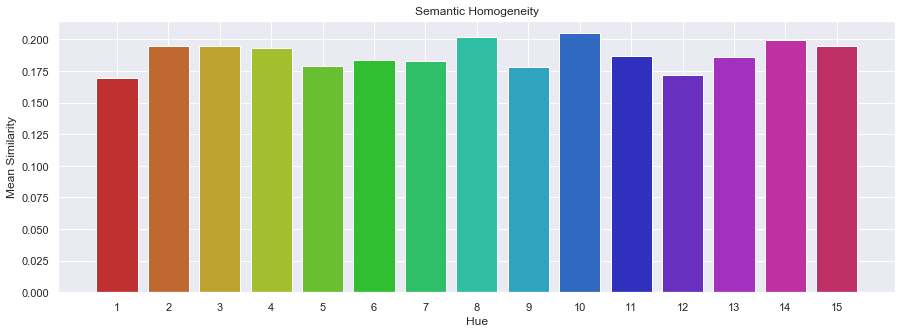

In [635]:
sns.set(font_scale=1) # font size 2
plt.bar([str(i) for i in np.arange(1,16)],[np.mean(hueDict[i].df.similarity) for i in np.arange(1,16)],color=mycols)
plt.xlabel('Hue')
plt.ylabel('Mean Similarity')
plt.title('Semantic Homogeneity')

The differences in semantic homogeniety are in line with what's expected, however the effect is much smaller. More processing of the words is needed to obtain better accuracy.